https://www.cs.huji.ac.il/labs/parallel/workload/l_unilu_gaia/index.html


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Считываем файл

In [ ]:
!wget http://www.cs.huji.ac.il/labs/parallel/workload/l_unilu_gaia/UniLu-Gaia-2014-2.swf.gz

In [7]:
def read_swf_file(file_path):
    col_names = ['job_number', 'submit_time', 'wait_time', 'run_time', 'num_procs',
                 'avg_cpu_time', 'used_memory', 'req_procs', 'req_time', 'req_memory',
                 'status', 'user_id', 'group_id', 'exec_id', 'queue_id',
                 'partition_id', 'orig_site', 'last_run_site']
    df = pd.read_csv(file_path, comment=';', header=None, names=col_names, delim_whitespace=True)
    return df

In [8]:
data = read_swf_file('./raw_data/UniLu-Gaia-2014-2.swf')

In [9]:
data = data.replace(-1, np.nan)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51987 entries, 0 to 51986
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   job_number     51987 non-null  int64  
 1   submit_time    51987 non-null  int64  
 2   wait_time      51987 non-null  int64  
 3   run_time       51959 non-null  float64
 4   num_procs      51987 non-null  int64  
 5   avg_cpu_time   49079 non-null  float64
 6   used_memory    50523 non-null  float64
 7   req_procs      51987 non-null  int64  
 8   req_time       51987 non-null  int64  
 9   req_memory     0 non-null      float64
 10  status         51987 non-null  int64  
 11  user_id        51987 non-null  int64  
 12  group_id       51987 non-null  int64  
 13  exec_id        51987 non-null  int64  
 14  queue_id       51987 non-null  int64  
 15  partition_id   0 non-null      float64
 16  orig_site      0 non-null      float64
 17  last_run_site  0 non-null      float64
dtypes: flo

In [5]:
data.isnull().groupby(data['queue_id']).sum()

,job_number,submit_time,wait_time,run_time,num_procs,avg_cpu_time,used_memory,req_procs,req_time,req_memory,status,user_id,group_id,exec_id,queue_id,partition_id,orig_site,last_run_site
queue_id,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,235,60,0,0,1850,0,0,0,0,0,1850,1850,1850
1,0,0,0,17,0,2472,1248,0,0,35222,0,0,0,0,0,35222,35222,35222
2,0,0,0,11,0,201,156,0,0,14915,0,0,0,0,0,14915,14915,14915


In [1]:
# Берем одну самую большую очередь
data = [data['queued_id'] == 1]


data.drop(columns=['partition_id', 'orig_site', 'last_run_site', 'group_id'])

NameError: name 'data' is not defined

<Axes: xlabel='job_number', ylabel='submit_time'>

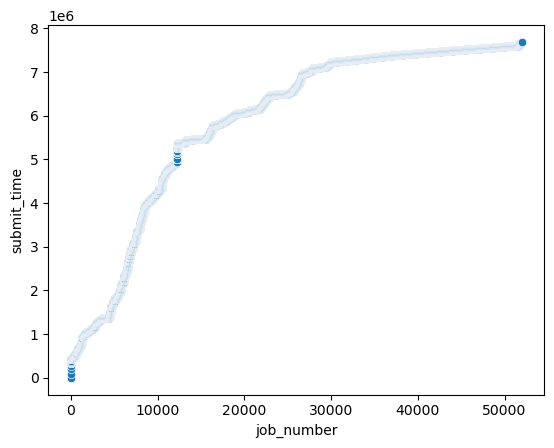

In [ ]:
sns.scatterplot(data=data, x='job_number', y='submit_time')